# Illustrating examples

In [73]:
import matplotlib.pyplot as np
import sys
sys.path.append("..")
import itertools
import matplotlib.pyplot as plt
import numpy.random as npr
import numpy.linalg as npl
import scipy.stats as spst
import scipy.integrate as spi
import seaborn as sns
import time

%load_ext autoreload
%autoreload 2
%pylab inline
figsize(12,8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## tools.py

### Graded lexicographic order 

In [2]:
from tools import GradedOrder
for i in GradedOrder(10, 2):
    print(i)

Loading /Users/rbardenet/Work/Lille/Python/dppmc/dppmc/myJacobiPoly.so
(0, 0)
(0, 1)
(1, 0)
(1, 1)
(0, 2)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
(0, 3)


In [3]:
# Schur inversion

In [16]:
# Fast Jacobi evaluation
n = 20
a = npr.rand()-.5
b = npr.rand()-.5
x = 2*npr.rand()-1
from tools import jacobi
print("Home-made Jacobi", jacobi(n,a,b,x))
%time jacobi(n, a, b, x)
import scipy.special as sps
print("Scipy's Jacobi", sps.eval_jacobi(n,a,b,x))
%time sps.jacobi(n, a, b)(x)

Home-made Jacobi 0.12297273568198173
CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 13.1 µs
Scipy's Jacobi 0.122972735682
CPU times: user 522 µs, sys: 107 µs, total: 629 µs
Wall time: 539 µs


0.12297273568198171

### Rejection sampling

In [5]:
from tools import rejectionSamplingWithBetaProposal
# generate some bivariate Gaussian sample
mu = .1*npr.randn(2)
Sigma = np.eye(2) + .2*npr.randn(4).reshape((2,2))
Sigma = .1*(Sigma+Sigma.T)
# Check Sigma is positive definite
print(Sigma, npl.eig(Sigma)[0])
f = lambda x: spst.multivariate_normal(mu, Sigma).pdf(x)
numSamples = 1000
x = np.array([rejectionSamplingWithBetaProposal(f, f(0)*100, 2)[0] for _ in range(numSamples)])

[[ 0.09742429  0.04136183]
 [ 0.04136183  0.14593806]] [ 0.07373122  0.16963112]


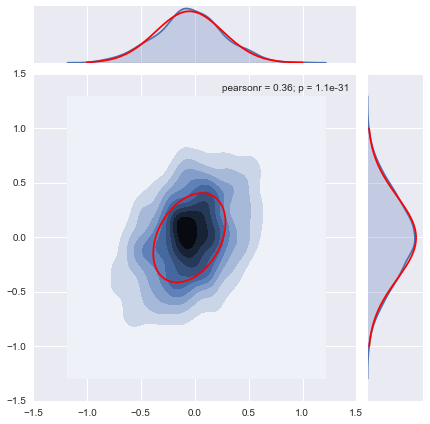

In [6]:
xPlot = np.linspace(-1,1,100)
g = sns.jointplot(x[:,0],x[:,1],kind="kde")
f = lambda x: spst.multivariate_normal(mu, Sigma).pdf(x)
# Add true joint to joint plot
X, Y = np.meshgrid(xPlot, xPlot)
nPlot = len(xPlot)
Z = np.array([f([x,y]) for x in xPlot for y in xPlot]).reshape((nPlot,nPlot)).T
g.ax_joint.contour(X, Y, Z, 1, colors='r', label="expected")
# Add true marginal to the marginal plots
g.ax_marg_x.plot(xPlot, spst.norm(mu[0],scale=np.sqrt(Sigma[0,0])).pdf(xPlot), color='r')
g.ax_marg_y.plot(spst.norm(mu[1],scale=np.sqrt(Sigma[1,1])).pdf(xPlot), xPlot, color='r')
plt.show()

## dpp.py

Let us plot a Chebyshev kernel

In [17]:
import dpp as dpplib
numSamples = 30
mydpp = dpplib.DPP(numSamples,1,[[-.5,-.5]],"cheby1D")

>> Computing Chow's bound
>> Initialized DPP


In [74]:
xplot = np.linspace(-1,1,100)
plt.plot(xplot, [mydpp.CDKernel(np.array(x).reshape((1,)), np.array(x).reshape((1,))) for x in xplot])

IndexError: index 1 is out of bounds for axis 0 with size 1

a,b 0.07171847584497326 0.2284405140192789
mode= 0.12054067186865261


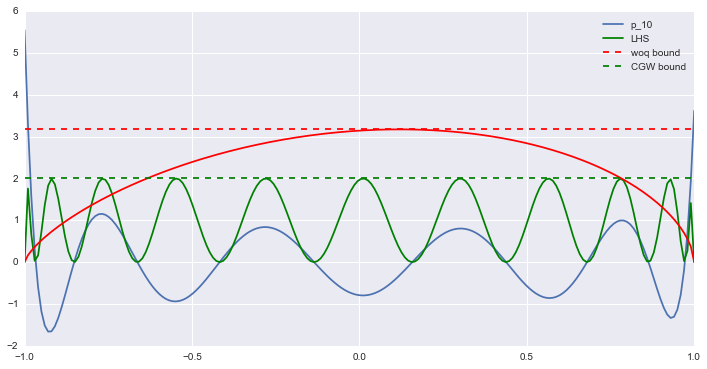

In [19]:
import scipy.special as sps
import numpy.random as npr
a = npr.rand()-.5
b = npr.rand()-.5
k = 10
aa = min(a,b)
bb = max(a,b)
print("a,b", aa, bb)
norm2 = spi.quad(lambda x: (1-x)**aa*(1+x)**bb*sps.jacobi(k,aa,bb,monic=1)(x)**2, -1, 1)[0]
xplot = np.linspace(-1,1,200)
p = lambda x: sps.jacobi(k,aa,bb,monic=1)(x)/np.sqrt(norm2)
plt.plot(xplot, [p(x) for x in xplot], label="p_"+str(k))
plt.plot(xplot, [np.pi*np.sqrt(1-x**2)*(1-x)**aa*(1+x)**bb*p(x)**2 for x in xplot], label= "LHS", color='g')

mode = (b-a)*1./(a+b+1)
print("mode=", mode)
woq = lambda x: np.pi*(1-x)**(a+.5)*(1+x)**(b+.5)
plt.plot(xplot, woq(xplot), color='r')
plt.plot([-1,1], woq(mode)*np.ones((2,)), '--', label="woq bound", color='r')
                        

# Compute Chow's bound
logBound = np.log(2) + sps.gammaln(k+aa+bb+1) + sps.gammaln(k+bb+1) - sps.gammaln(k+aa+1) - sps.gammaln(k+1) - 2*bb*np.log(k+(aa+bb+1.)/2)
plt.plot([-1,1], np.exp(logBound)*np.ones((2,)), '--', label="CGW bound", color='g')
plt.legend()
plt.show()

In [75]:
N = 10
theta = .13
print(N/2. + .5*np.cos((N-1)*theta)*np.sin(N*theta)/np.sin(theta))
print(np.sum([np.cos(k*theta)**2 for k in range(N)]))

6.44998007999
6.44998007999


In [78]:
p = [[-.2,+.2], [0., .5]]
npr.seed(3)
numSamples = 100
mydpp = dpplib.DPP(numSamples,2,p,"test2D")
mydpp.sample()
mydpp.save()
# finish this
# do proper rejection sampling

>> Computing Chow's bound
>> Initialized DPP
Sampling the 100 th point
Sampling the 99 th point
Sampling the 98 th point
Sampling the 97 th point
Sampling the 96 th point
Sampling the 95 th point
Sampling the 94 th point
Sampling the 93 th point
Sampling the 92 th point
Sampling the 91 th point
Sampling the 90 th point
Sampling the 89 th point
Sampling the 88 th point
Sampling the 87 th point
Sampling the 86 th point
Sampling the 85 th point
Sampling the 84 th point
Sampling the 83 th point
Sampling the 82 th point
Sampling the 81 th point
Sampling the 80 th point
Sampling the 79 th point
Sampling the 78 th point
Sampling the 77 th point
Sampling the 76 th point
Sampling the 75 th point
Sampling the 74 th point
Sampling the 73 th point
Sampling the 72 th point
Sampling the 71 th point
Sampling the 70 th point
Sampling the 69 th point
Sampling the 68 th point
Sampling the 67 th point
Sampling the 66 th point
Sampling the 65 th point
Sampling the 64 th point
Sampling the 63 th point
Samp

KeyboardInterrupt: 

[[-0.2, 0.2], [0.0, 0.5]]


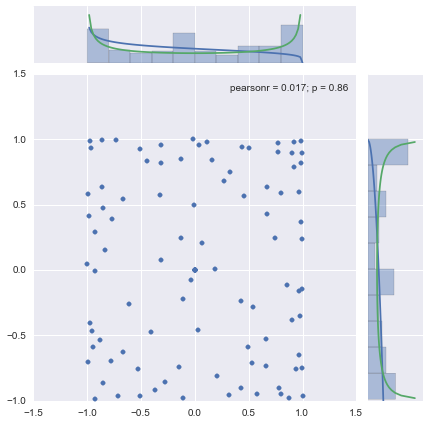

In [79]:
X = np.array(mydpp.X)
g = sns.jointplot(X[:,0], X[:,1], marginal_kws=dict(bins=10))

print(p)
xplot = np.linspace(-1.,1.,100)
aa = p[0][0]
bb = p[0][1]
g.ax_marg_x.plot(xplot, 2**(-aa-bb+3)*spst.beta(aa+1, bb+1).pdf((1+xplot)/2))
g.ax_marg_x.plot(xplot, 2**(3)*spst.beta(.5, .5).pdf((1+xplot)/2))
aa = p[1][0]
bb = p[1][1]
g.ax_marg_y.plot(2**(-aa-bb+3)*spst.beta(aa+1, bb+1).pdf((1+xplot)/2), xplot)
g.ax_marg_y.plot(2**(3)*spst.beta(.5, .5).pdf((1+xplot)/2), xplot)
plt.show()

(array([ 21.,   8.,   6.,   8.,   8.,   6.,   7.,   3.,   9.,  24.]),
 array([-0.99072977, -0.79196511, -0.59320045, -0.39443578, -0.19567112,
         0.00309354,  0.2018582 ,  0.40062286,  0.59938753,  0.79815219,
         0.99691685]),
 <a list of 10 Patch objects>)

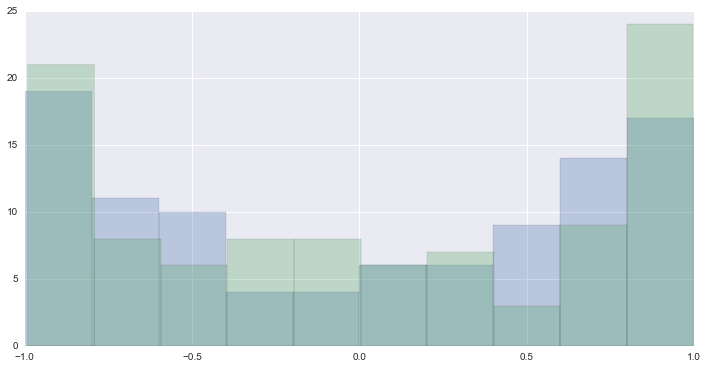

In [72]:
plt.hist(mydpp.X[:,0], alpha=.3)
plt.hist(mydpp.X[:,1], alpha=.3)

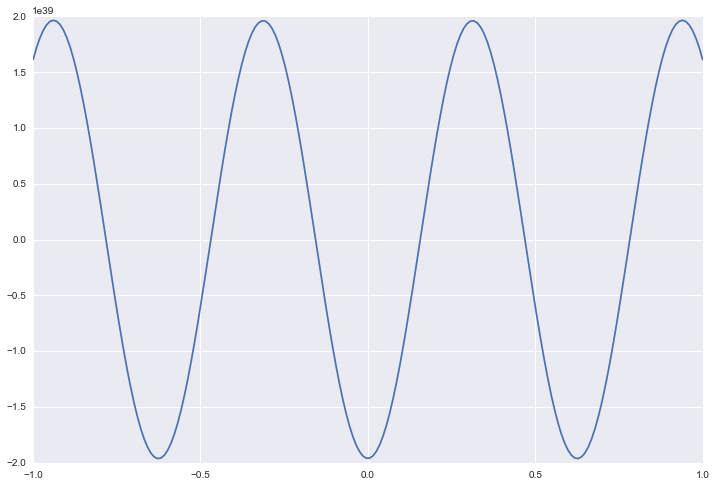

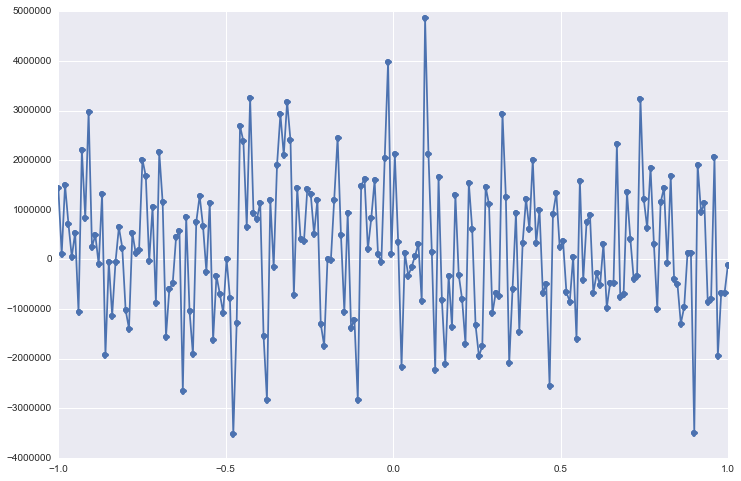

In [105]:
nMax = 70
f = lambda n, x: np.exp(-x**2/2)*sps.eval_hermite(n, x)
norms2 = [spi.quad(lambda x: f(n,x)**2, -10, 10) for n in range(nMax)]

def g(x):
    return [np.sum([npr.randn()*f(n,xx)/np.sqrt(norms2[n]) for n in range(nMax)]) for xx in x]

xplot = np.linspace(-1,1,200)
plt.plot(xplot, f(50, xplot))
plt.show()
plt.plot(xplot, g(xplot), '-o')
plt.show()